<a href="https://colab.research.google.com/github/aruna-1985/Numpy/blob/master/employee__sal_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statistics

In [2]:
from statistics import *

In [3]:
mean([10,20,30,40,50,60])

35

In [4]:
mode([1,2,34,65,87,20,65])

65

In [5]:
median([10,20,30,40,50,60])

35.0

In [6]:
pstdev([2.5,3.45,2.75,5.5,9.5])

2.6029598537050087

In [7]:
stdev([2.5,3.45,2.75,5.5,9.5])

2.910197587793654

In [8]:
import numpy as np 
import pandas as pd

In [9]:
np.random.seed(62)

In [11]:
normal_male_sal = np.random.normal(loc = 82, scale = 8,size =6000)
normal_female_sal = np.random.normal(loc= 70,scale =6,size = 6500)

In [12]:
all_salaries = np.concatenate((normal_male_sal,normal_female_sal),axis = 0)

In [13]:
df_ppl_mass = pd.DataFrame(data = {'salaries_sal':all_salaries})

In [14]:
df_ppl_mass.head()

,salaries_sal
0,66.334748
1,67.074769
2,90.740878
3,83.414959
4,83.127746


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Distribution of People salaries in sal')

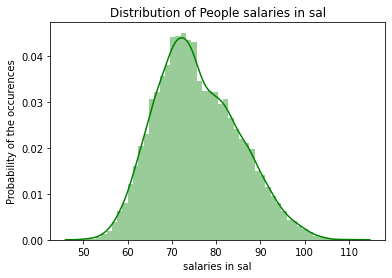

In [20]:
sns.distplot(df_ppl_mass,color = "green")
plt.xlabel("salaries in sal")
plt.ylabel("Probability of the occurences")
plt.title("Distribution of People salaries in sal")

In [21]:
pop_mean_sal = df_ppl_mass['salaries_sal'].mean()
pop_mean_sal

75.74392807311679

In [22]:
pop_std_dev_sal = df_ppl_mass['salaries_sal'].std()
pop_std_dev_sal

9.318380423593398

In [24]:
## Taking Random Samples from the population 
sample_means = []
n = 45
for sample in range(0,500):
    #Random choice with replacement
    sample_values = np.random.choice(a = df_ppl_mass['salaries_sal'],size = n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Text(0, 0.5, 'Frequency of occurence')

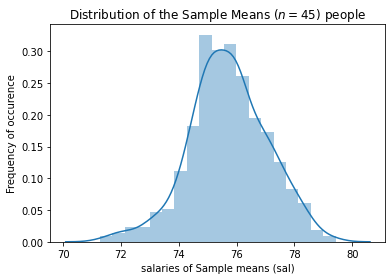

In [25]:
sns.distplot(sample_means)
plt.title("Distribution of the Sample Means $(n=45)$ people")
plt.xlabel("salaries of Sample means (sal)")
plt.ylabel("Frequency of occurence")

In [26]:
median_of_sample = np.median(sample_means)
median_of_sample

75.71850509577952

In [27]:
mean_of_sample = np.mean(sample_means)
mean_of_sample

75.71078538074352

In [28]:
print("The population mean is",pop_mean_sal)
print("The sample mean is:",mean_of_sample)

The population mean is 75.74392807311679
The sample mean is: 75.71078538074352


In [29]:
std_dev_of_sample = np.std(sample_means)
std_dev_of_sample

1.3504940328845725

In [30]:
standard_error = pop_std_dev_sal/np.sqrt(n)
standard_error

1.3891021378238748

In [31]:
employee_sample_mean = 75

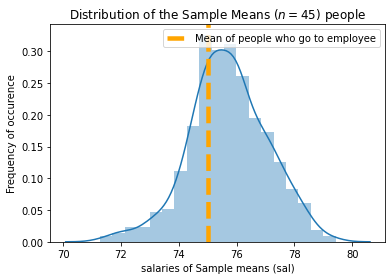

In [33]:
sns.distplot(sample_means)
plt.title("Distribution of the Sample Means $(n=45)$ people")
plt.xlabel("salaries of Sample means (sal)")
plt.ylabel("Frequency of occurence")
plt.axvline(x =employee_sample_mean,linestyle = '--',linewidth = 4.5,label = 'Mean of people who go to employee',c = 'orange')
plt.legend()

In [34]:
z_score = (employee_sample_mean - mean_of_sample)/standard_error
z_score

-0.5116869101195187

In [35]:
import scipy.stats as stats
prop_less_than_employee_mean = round(stats.norm.cdf(z_score),3)
prop_less_than_employee_mean

0.304

Text(0, 0.5, 'Frequency of occurence')

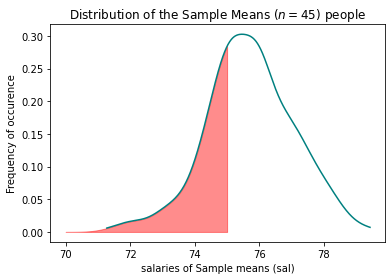

In [38]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means),np.max(sample_means),1000)
plt.plot(pos,kde(pos),color = "Teal")
shade = np.linspace(70,employee_sample_mean,300)
plt.fill_between(shade,kde(shade),alpha = 0.45,color = 'Red')

plt.title("Distribution of the Sample Means $(n=45)$ people")
plt.xlabel("salaries of Sample means (sal)")
plt.ylabel("Frequency of occurence")

# New Section